# 문제 정의
* 은행의 마케팅 캠페인 데이터를 사용하여 고객의 정기예금 가입 여부를 예측합니다.

# 데이터 수집
* https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
plt.style.use('ggplot')

# 사용자 정의 팔레트
custom_palette = {'yes': 'cyan', 'no': 'gray'}

# 데이터 불러오기
* 독립변수와 종속변수 확인
  * 종속변수 : deposit (yes/no) --> 이진분류
  * 독립변수 : 총 16개의 독립변수가 있음. 연속형/범주형 혼합

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/bank.csv')

# 컬럼 및 독립변수와 종속변수 확인
display(df.head())
display(df.tail())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [3]:
# 데이터 크기 확인
df.shape

(11162, 17)

In [4]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# 결측치 확인
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# 데이터 탐색
* 데이터의 분포
* 종속변수(deposit)와의 관계

# 전체
* 정기예금 가입자 비율

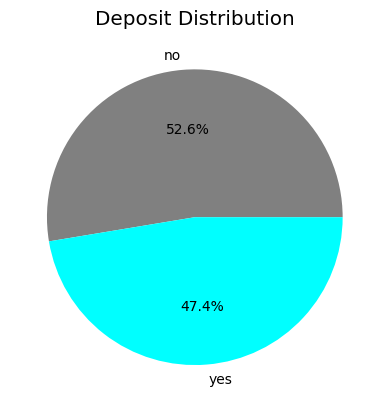

In [6]:
plt.pie(df['deposit'].value_counts(), labels=df['deposit'].value_counts().index, autopct='%1.1f%%', colors=['gray','cyan'])
plt.title('Deposit Distribution')
plt.show()

## 인구통계학정보

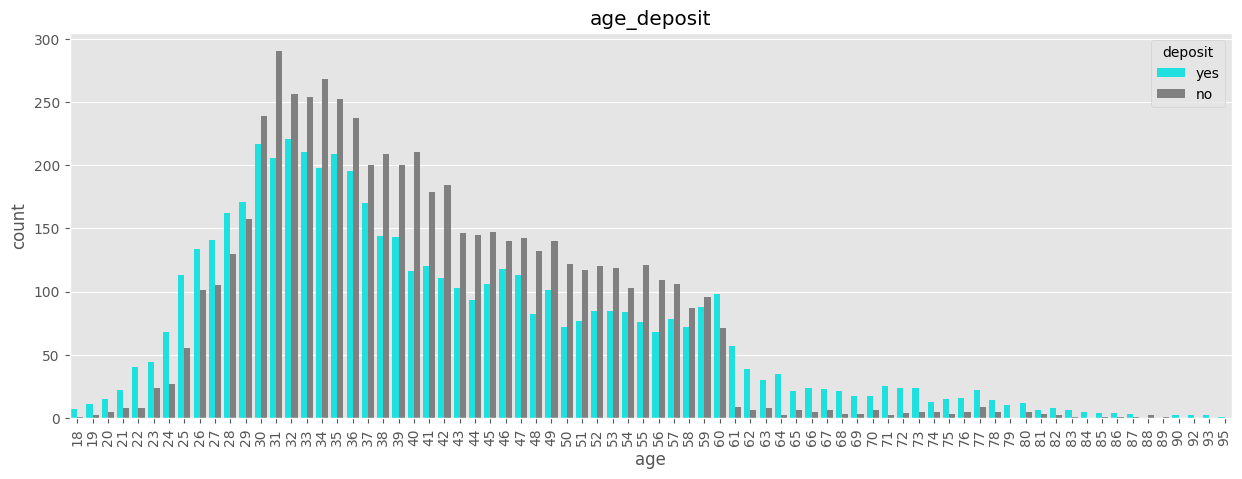

In [7]:
# age
# 18세~95세
# 30~59세 : 정기예금 가입율이 낮음
# why?
# 자녀 양육비용? 주택구입으로 인한 대출? 다른 재테크 수단?
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('age_deposit')
plt.show()

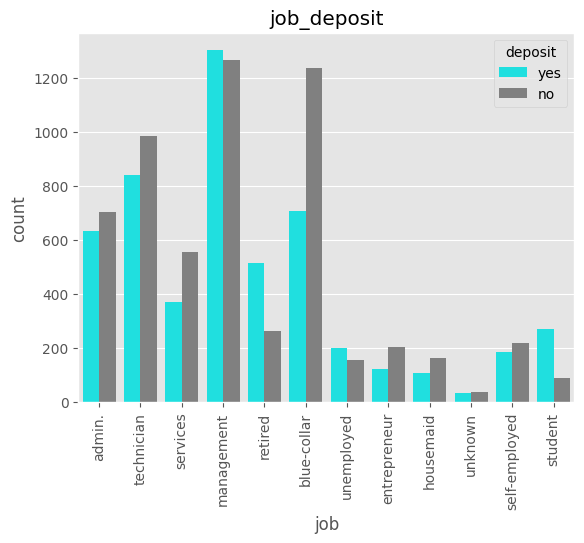

In [8]:
# job
# 은퇴자, 실직자, 학생 정기예금 가입율이 높음
# 블루컬러 정기예금 가입율 특히 낮음
sns.countplot(x='job', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('job_deposit')
plt.show()

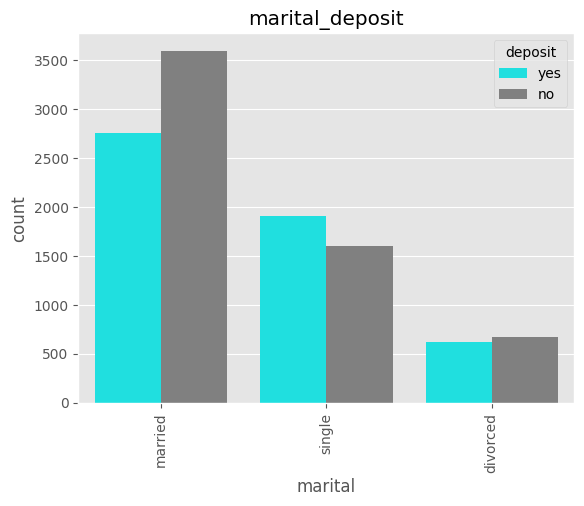

In [9]:
# marital
sns.countplot(x='marital', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('marital_deposit')
plt.show()

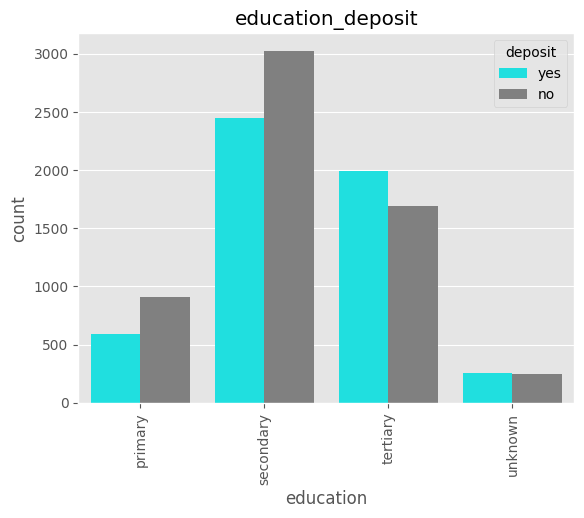

In [10]:
# education : 교육수준
# primary : 초등
# secondary : 중고등
# tertiary : 대학이상
custom_order = ['primary', 'secondary', 'tertiary', 'unknown']
sns.countplot(x='education', data=df, hue='deposit', order = custom_order, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('education_deposit')
plt.show()

## 금융관련정보

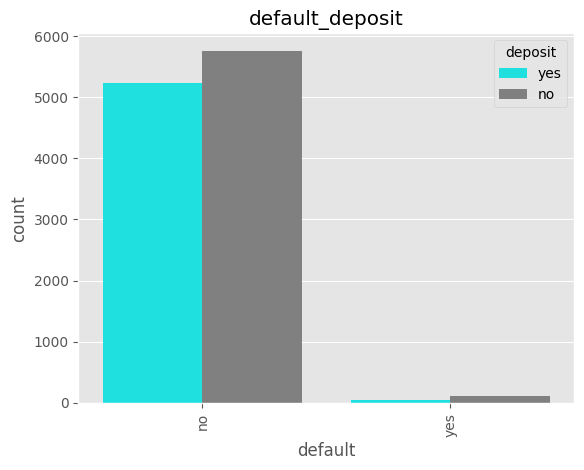

In [11]:
# default : 신용불이행여부
# 대부분이 no
sns.countplot(x='default', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('default_deposit')
plt.show()

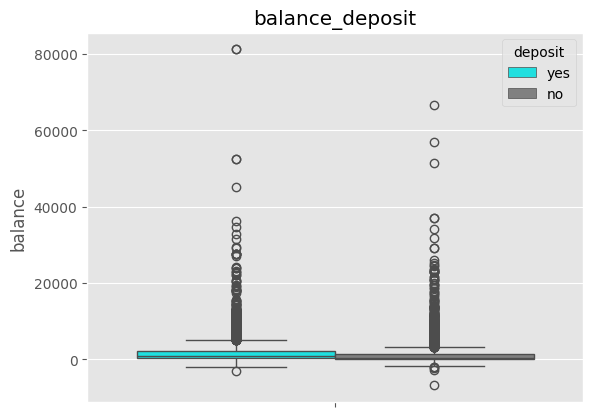

In [12]:
# balance : 연간평균잔고
sns.boxplot(y='balance',  data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('balance_deposit')
plt.show()

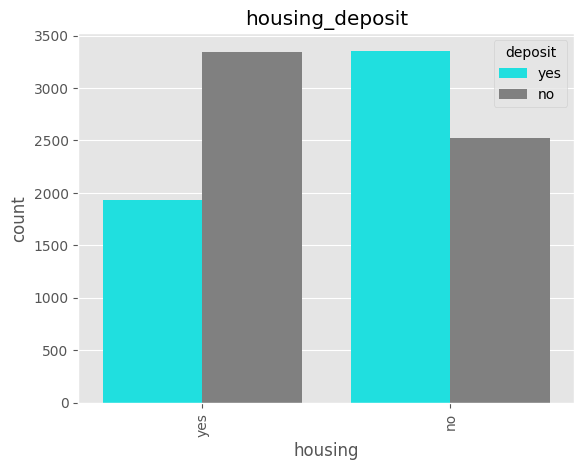

In [13]:
# housing : 주택대출여부
sns.countplot(x='housing', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('housing_deposit')
plt.show()

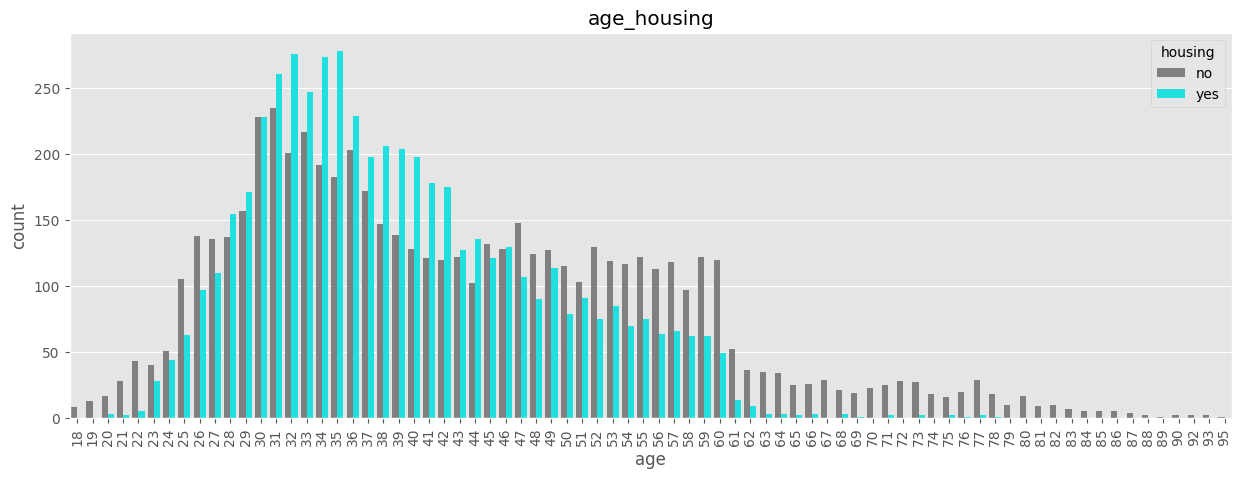

In [14]:
# age_housing
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=df, hue='housing', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('age_housing')
plt.show()

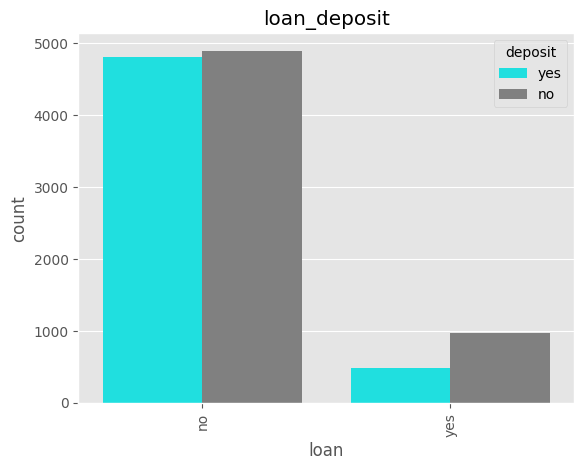

In [15]:
# loan : 개인대출여부
sns.countplot(x='loan', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('loan_deposit')
plt.show()

## 현재 캠페인 관련 정보

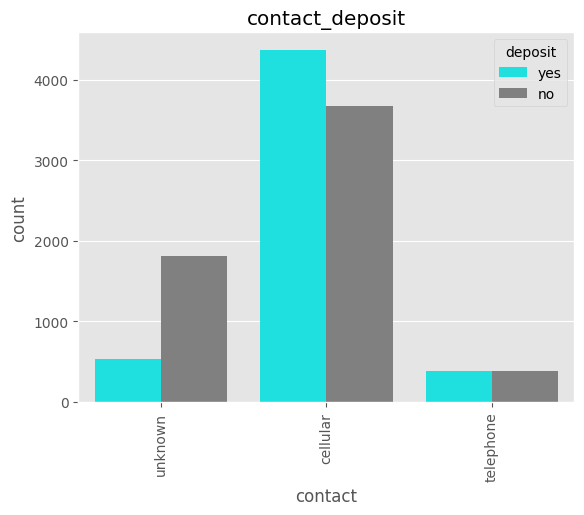

In [16]:
# contact : 연락수단
sns.countplot(x='contact', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('contact_deposit')
plt.show()

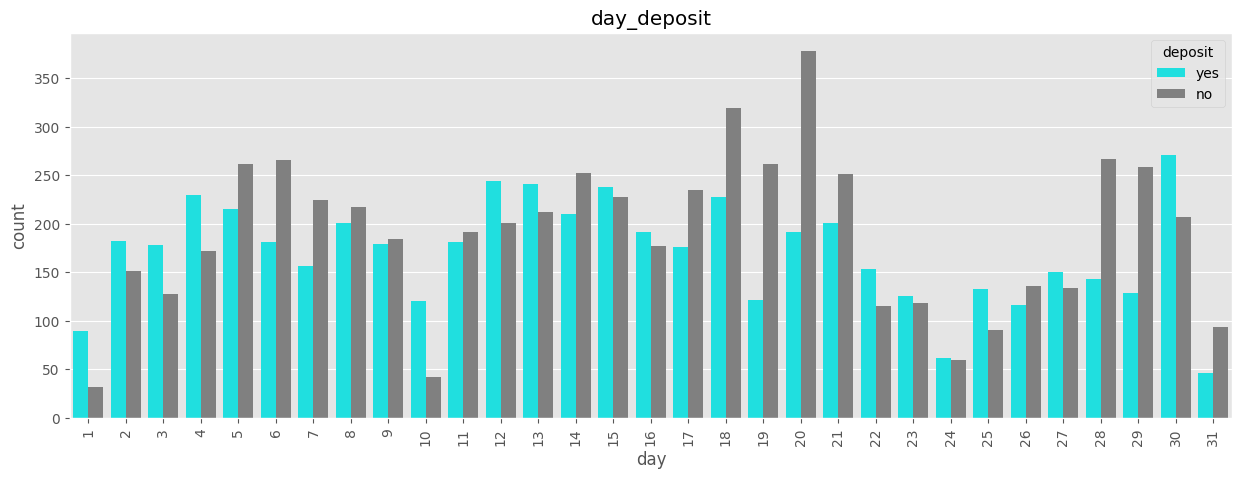

In [17]:
# day : 연락일자
# 월급날짜, 카드값상환날짜 등과 연관이 있을까?
plt.figure(figsize=(15,5))
sns.countplot(x='day', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('day_deposit')
plt.show()

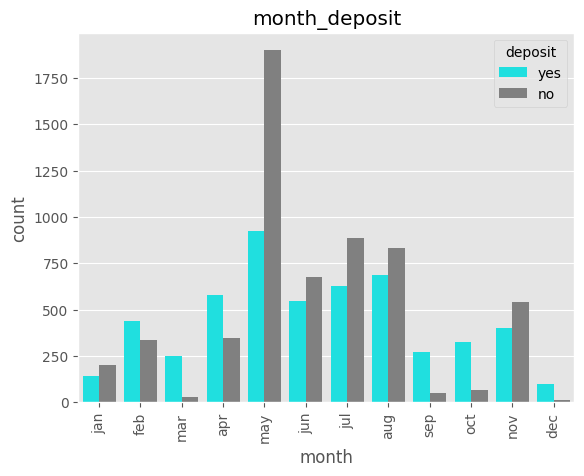

In [18]:
# month : 연락월
# 특히 5월에 가입율이 낮은 이유는?
custom_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(x='month', data=df, hue='deposit', order=custom_order, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('month_deposit')
plt.show()

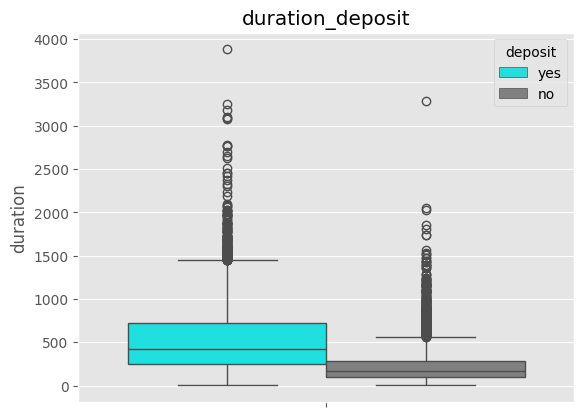

In [19]:
# duration : 마지막 연락 후 경과 시간
sns.boxplot(y='duration',  data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('duration_deposit')
plt.show()

## 기타 캠페인 관련 정보

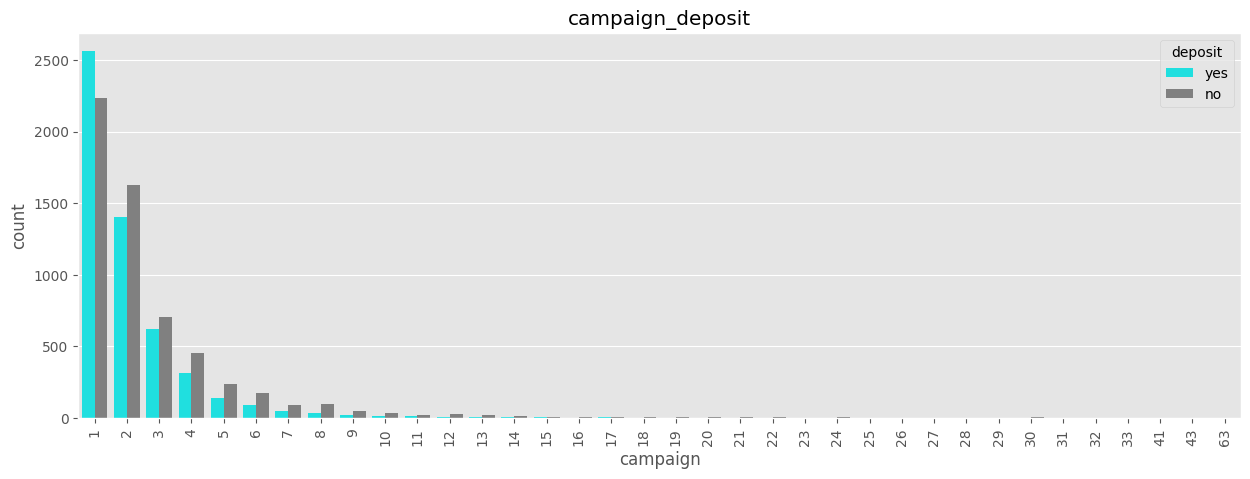

In [20]:
# campaign : 현재 캠페인 동안 연락 횟수
plt.figure(figsize=(15,5))
sns.countplot(x='campaign', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('campaign_deposit')
plt.show()

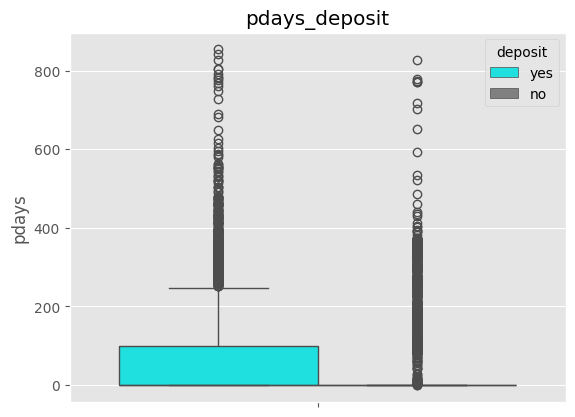

In [21]:
# pdays : 이전 캠페인 이후 경과일수(-1은 이전에 연락하지 않음을 의미)
sns.boxplot(y='pdays',  data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('pdays_deposit')
plt.show()

In [22]:
df['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 717       1
 159       1
 118       1
 241       1
 15        1
Name: count, Length: 472, dtype: int64

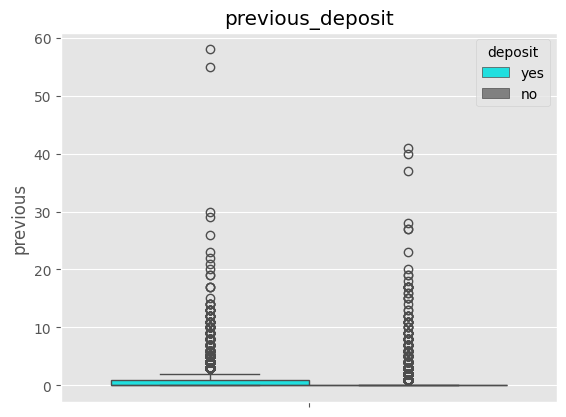

In [23]:
# previous : 이전 캠페인에서 연락 횟수
sns.boxplot(y='previous',  data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('previous_deposit')
plt.show()

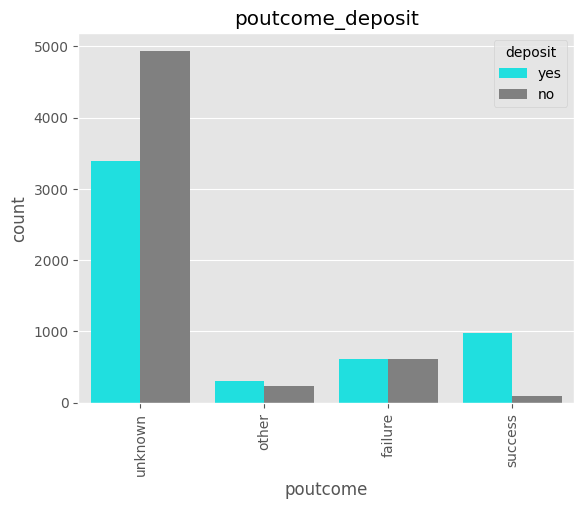

In [24]:
# poutcome : 이전 마케팅 캠페인의 결과
# 이전 마케팅에 성공한 고객이 이번 마케팅에도 성공
sns.countplot(x='poutcome', data=df, hue='deposit', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('poutcome_deposit')
plt.show()

# 데이터 전처리


## 종속변수와 독립변수

In [25]:
# 독립변수와 종속변수 분리
X = df.drop('deposit', axis=1)
y = df['deposit']

## 종속변수의 데이터 변환
* yes -> 1
* no -> 0

In [26]:
y = y.map({'yes': 1, 'no': 0})
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

## 범주형 변수의 레이블 인코딩

In [27]:
# 범주형 변수만 추출하기
objs = X.select_dtypes(include="object").columns.tolist()

# 수치형 변수만 추출하기
nums = df.select_dtypes(exclude="object").columns.tolist()

print(objs)
print(nums)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [28]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체를 저장할 딕셔너리
encoders = {}

# 원본은 그대로 두고 복사본으로 작업
X_preprocessed = X.copy()

# 각 열에 대해 레이블 인코딩 수행
for obj in objs:
    le = LabelEncoder()
    X_preprocessed[obj] = le.fit_transform(X[obj])
    encoders[obj] = le  # 각 열의 LabelEncoder 저장

# 인코딩된 결과 확인
for obj in objs:
    print(f"Column: {obj}")
    print(f"Classes: {encoders[obj].classes_}")
    print(f"Encoded Values: {X_preprocessed[obj].unique()}")
    print()

display(X.head())
display(X_preprocessed.head())


Column: job
Classes: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Encoded Values: [ 0  9  7  4  5  1 10  2  3 11  6  8]

Column: marital
Classes: ['divorced' 'married' 'single']
Encoded Values: [1 2 0]

Column: education
Classes: ['primary' 'secondary' 'tertiary' 'unknown']
Encoded Values: [1 2 0 3]

Column: default
Classes: ['no' 'yes']
Encoded Values: [0 1]

Column: housing
Classes: ['no' 'yes']
Encoded Values: [1 0]

Column: loan
Classes: ['no' 'yes']
Encoded Values: [0 1]

Column: contact
Classes: ['cellular' 'telephone' 'unknown']
Encoded Values: [2 0 1]

Column: month
Classes: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Encoded Values: [ 8  6  5  1 10  9  2  4  3  7  0 11]

Column: poutcome
Classes: ['failure' 'other' 'success' 'unknown']
Encoded Values: [3 1 0 2]



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


## 수치형변수의 스케일링

In [29]:
# 수치형데이터의 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_preprocessed[nums] = scaler.fit_transform(X[nums])
display(X.head())
display(X_preprocessed.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.491505,0,1,1,0,0.252525,1,0,2,-1.265746,8,1.930226,-0.554168,-0.481184,-0.36326,3
1,1.239676,0,1,1,0,-0.459974,0,0,2,-1.265746,8,3.154612,-0.554168,-0.481184,-0.36326,3
2,-0.019470,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.929901,-0.554168,-0.481184,-0.36326,3
3,1.155733,7,1,1,0,0.293762,1,0,2,-1.265746,8,0.596366,-0.554168,-0.481184,-0.36326,3
4,1.071790,0,1,2,0,-0.416876,0,0,2,-1.265746,8,0.867171,-0.186785,-0.481184,-0.36326,3


## 변수의 중요도 평가

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# df_preprocessed: 레이블 인코딩된 데이터프레임
# objs: 범주형 변수들의 이름 리스트
# nums: 연속형 변수들의 이름 리스트

# 범주형 변수와 수치형 변후 분리
X_objs = X_preprocessed[objs]
X_nums = X_preprocessed[nums]

# 범주형 변수에 대해 chi2 사용
selector_cat = SelectKBest(score_func=chi2, k='all')
X_new_cat = selector_cat.fit_transform(X_objs, y)
selected_cat_indices = selector_cat.get_support(indices=True)
selected_cat_features = X_objs.columns[selected_cat_indices]
cat_scores = selector_cat.scores_[selected_cat_indices]

# 연속형 변수에 대해 f_classif 사용
selector_cont = SelectKBest(score_func=f_classif, k='all')
X_new_cont = selector_cont.fit_transform(X_nums, y)
selected_cont_indices = selector_cont.get_support(indices=True)
selected_cont_features = X_nums.columns[selected_cont_indices]
cont_scores = selector_cont.scores_[selected_cont_indices]

# 점수와 특성을 데이터프레임으로 결합
selected_features_df = pd.DataFrame({
    'Feature': selected_cat_features.tolist() + selected_cont_features.tolist(),
    'Score': np.concatenate([cat_scores, cont_scores])
})

# 점수 기준으로 정렬
selected_features_df = selected_features_df.sort_values(by='Score', ascending=False)

print("Features sorted by importance:")
print(selected_features_df)


Features sorted by importance:
      Feature        Score
12   duration  2864.172247
6     contact   953.667451
14      pdays   262.492195
4     housing   244.474430
15   previous   222.677159
13   campaign   186.129893
5        loan   118.635404
0         job   103.960727
10    balance    73.940086
8    poutcome    67.848776
2   education    44.909241
11        day    35.518905
7       month    28.774412
3     default    18.193635
1     marital    16.646005
9         age    13.610293


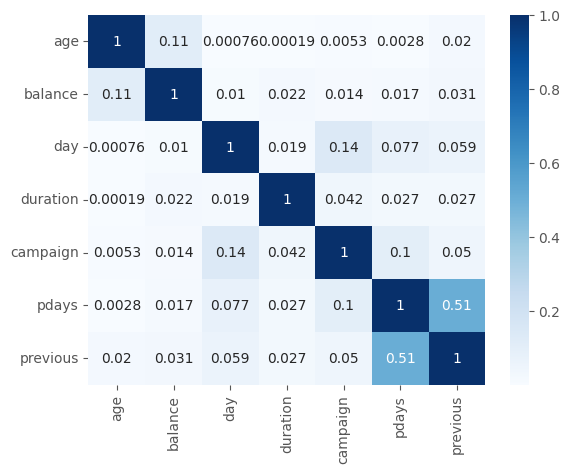

In [31]:
# 다중공선성 : 수치형 변수간의 상관관계 확인
sns.heatmap(abs(X_preprocessed[nums].corr()), cmap='Blues', annot=True)
plt.show()

## 데이터 분할

In [32]:
# 훈련 및 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8929, 16), (2233, 16), (8929,), (2233,))

# 모델링

## LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
model_lr = LogisticRegression()

# 훈련데이터로 학습
model_lr.fit(X_train, y_train)

# 예측값
y_pred = model_lr.predict(X_test)

# 정확도
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test, y_pred))

# 과적합 확인
print("test accuracy:", model_lr.score(X_test, y_test))
print("train accuracy:", model_lr.score(X_train, y_train))

accuracy_score: 0.7895208240035826
test accuracy: 0.7895208240035826
train accuracy: 0.7978497032142458


In [34]:
# 모델이 학습한 결과

# lr 모델의 계수(coefficients)
print("Coefficients:", model_lr.coef_)

# lr 모델의 절편(intercept)
print("Intercept:", model_lr.intercept_)


Coefficients: [[ 0.06840162  0.00864729  0.14426429  0.22470349 -0.42074239  0.08732128
  -1.04276797 -0.69603274 -0.69404277 -0.0610081   0.04026486  1.7719395
  -0.35537112  0.33458438  0.27531366  0.16511208]]
Intercept: [-0.24813245]


In [35]:
# 모델의 성능 평가

# 테스트 데이터 예측
y_pred = model_lr.predict(X_test)

# 모델의 평가 지표
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1166
           1       0.79      0.76      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



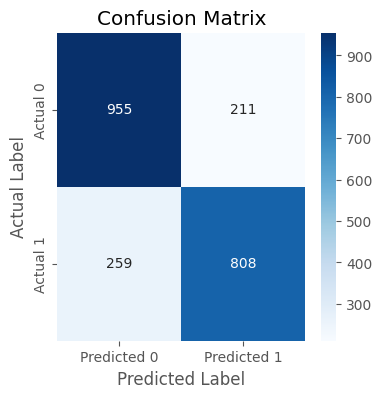

In [36]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


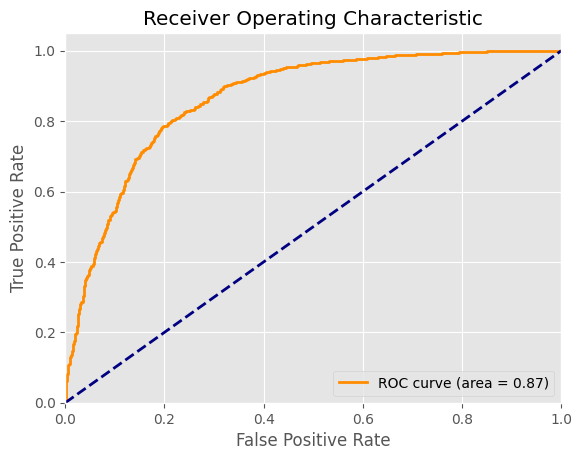

In [37]:
# roc_auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 예측 확률 계산
y_pred_proba = model_lr.predict_proba(X_test)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [38]:
# prompt: 모델의 학습 결과 저장

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 모델의 학습결과 저장
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision Score','Recall Score','F1-Score','roc_auc'])

y_pred = model_lr.predict(X_test)
model_result = ['Linear Regression',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]
results.loc[len(results)]=model_result
results


,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.789521,0.792934,0.757263,0.774688,0.788151


## KNN Classifier

In [39]:
# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# 예측값
y_pred = model_knn.predict(X_test)

# 정확도
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test, y_pred))

print("test accuracy:", model_knn.score(X_test, y_test))
print("train accuracy:", model_knn.score(X_train, y_train))

accuracy_score: 0.793551276309897
test accuracy: 0.793551276309897
train accuracy: 0.8621346175383582


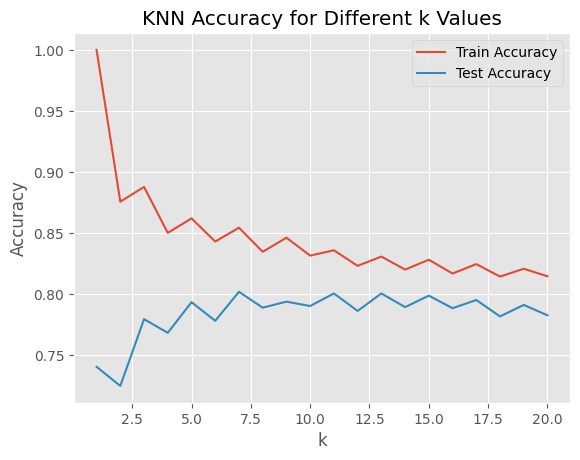

Optimal k: 7
Test accuracy with optimal k: 0.8020600089565607


In [40]:
# prompt: 과적합 해결

import matplotlib.pyplot as plt
# KNN Classifier - 최적의 k 찾기
k_values = range(1, 21)  # 1부터 20까지 k 값 테스트
train_scores = []
test_scores = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    train_scores.append(model_knn.score(X_train, y_train))
    test_scores.append(model_knn.score(X_test, y_test))

# 결과 시각화
plt.plot(k_values, train_scores, label='Train Accuracy')
plt.plot(k_values, test_scores, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.show()

# 최적의 k 값 선택 (테스트 정확도가 가장 높고 과적합이 적은 k)
optimal_k = test_scores.index(max(test_scores)) + 1  # 인덱스는 0부터 시작하므로 1 더함
print("Optimal k:", optimal_k)

# 최적의 k 값으로 모델 재학습 및 평가
best_model_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_model_knn.fit(X_train, y_train)
y_pred = best_model_knn.predict(X_test)
print("Test accuracy with optimal k:", accuracy_score(y_test, y_pred))


In [41]:
# prompt: 모델의 학습 결과 저장

y_pred = model_knn.predict(X_test)

model_result = ['KNN',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]
results.loc[len(results)]=model_result
results


,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.789521,0.792934,0.757263,0.774688,0.788151
1,KNN,0.782803,0.825503,0.691659,0.752677,0.778934


## Decision Tree Classifier

In [42]:
# 모델 생성 및 훈련
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# 모델 평가
print("test accuracy:", model_dt.score(X_test, y_test))
print("train accuracy:", model_dt.score(X_train, y_train))

test accuracy: 0.7653381101656964
train accuracy: 1.0


In [43]:
# prompt: decisiontree 과적합 해결

# Decision Tree Classifier with Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# 모델 생성
model_dt = DecisionTreeClassifier()

# 하이퍼파라미터 튜닝을 위한 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(model_dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best hyperparameters:", grid_search.best_params_)

# 최적의 모델
best_model_dt = grid_search.best_estimator_

# 모델 평가
print("test accuracy:", best_model_dt.score(X_test, y_test))
print("train accuracy:", best_model_dt.score(X_train, y_train))


Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
test accuracy: 0.8096730855351545
train accuracy: 0.8436555045357823


c:\Users\chopi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


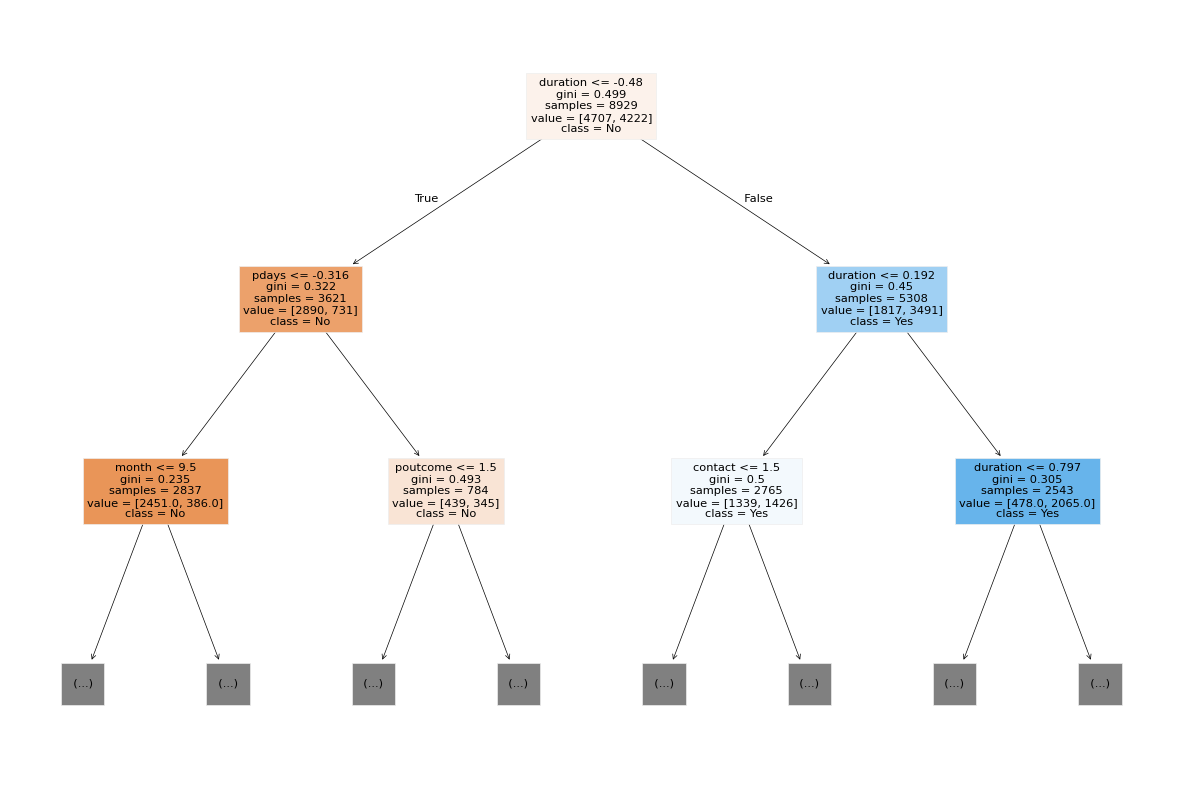

In [44]:
# 모델의 학습 결과 시각화

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(best_model_dt, max_depth=2, feature_names=X_preprocessed.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [45]:
# 모델의 학습결과 저장

y_pred = best_model_dt.predict(X_test)
model_result = ['Decision Tree Classifier',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]
results.loc[len(results)]=model_result
results


,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.789521,0.792934,0.757263,0.774688,0.788151
1,KNN,0.782803,0.825503,0.691659,0.752677,0.778934
2,Decision Tree Classifier,0.809673,0.810445,0.785380,0.797715,0.808642


## RandomForest Classifier

In [46]:
# 모델 생성 및 훈련
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# 모델 평가
print("test accuracy:", model_rf.score(X_test, y_test))
print("train accuracy:", model_rf.score(X_train, y_train))

test accuracy: 0.8316166592028661
train accuracy: 1.0


In [47]:
# prompt: RandomizedSearchCV로 최적화해줘.

from sklearn.model_selection import RandomizedSearchCV

# 모델 생성
model_rf = RandomForestClassifier()

# 하이퍼파라미터 튜닝을 위한 그리드 설정
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
random_search = RandomizedSearchCV(model_rf, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best hyperparameters:", random_search.best_params_)

# 최적의 모델
best_model_rf = random_search.best_estimator_

# 모델 평가
print("test accuracy:", best_model_rf.score(X_test, y_test))
print("train accuracy:", best_model_rf.score(X_train, y_train))


Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30}
test accuracy: 0.8271383788625168
train accuracy: 0.9310113114570501


In [48]:
# 모델의 학습결과 저장

y_pred = best_model_rf.predict(X_test)
model_result = ['RandomFroest Classifier',accuracy_score(y_test,y_pred),
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]
results.loc[len(results)]=model_result
results


,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.789521,0.792934,0.757263,0.774688,0.788151
1,KNN,0.782803,0.825503,0.691659,0.752677,0.778934
2,Decision Tree Classifier,0.809673,0.810445,0.785380,0.797715,0.808642
3,RandomFroest Classifier,0.827138,0.798946,0.852858,0.825023,0.828230


# 예측하기

In [49]:
# 예측할 데이터
data = pd.DataFrame(
    [[40,'admin.','married','tertiary','no',3000,'yes','no','cellular',5,'aug',1042,1,-1,0,'unknown'],
        [19,'student','single','secondary','no',100,'no','no','unknown',1,'may',673,4,-1,0,'unknown'],
        [35,'services','married','tertiary','yes',1000,'no','no','telephone',8,'jul',257,1,-1,0,'unknown']],
    columns=X.columns
)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,admin.,married,tertiary,no,3000,yes,no,cellular,5,aug,1042,1,-1,0,unknown
1,19,student,single,secondary,no,100,no,no,unknown,1,may,673,4,-1,0,unknown
2,35,services,married,tertiary,yes,1000,no,no,telephone,8,jul,257,1,-1,0,unknown


In [50]:
# 레이블 인코딩
data_preprocessed = data.copy()
for obj in objs:
    le = encoders[obj]
    data_preprocessed[obj] = le.transform(data[obj])
data_preprocessed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,0,1,2,0,3000,1,0,0,5,1,1042,1,-1,0,3
1,19,8,2,1,0,100,0,0,2,1,8,673,4,-1,0,3
2,35,7,1,2,1,1000,0,0,1,8,5,257,1,-1,0,3


In [51]:
# 정규화
data_preprocessed[nums] = scaler.transform(data[nums])
data_preprocessed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.103413,0,1,2,0,0.456229,1,0,0,-1.265746,1,1.930226,-0.554168,-0.481184,-0.36326,3
1,-1.866218,8,2,1,0,-0.442921,0,0,2,-1.740784,8,0.867171,0.547981,-0.481184,-0.36326,3
2,-0.523129,7,1,2,1,-0.163874,0,0,1,-0.909466,5,-0.331287,-0.554168,-0.481184,-0.36326,3


In [52]:

# LogisticRegression으로 예측하기
y_pred = model_lr.predict(data_preprocessed)
y_pred_proba = model_lr.predict_proba(data_preprocessed)
print('예측결과(1:가입, 0:미가입):',y_pred)
print('정기예금에 가입할 확률:',y_pred_proba[:,1])

예측결과(1:가입, 0:미가입): [1 1 0]
정기예금에 가입할 확률: [0.96458387 0.68661726 0.34124435]


In [53]:
# knn으로 예측하기
y_pred = model_knn.predict(data_preprocessed)
y_pred_proba = model_knn.predict_proba(data_preprocessed)
print('예측결과(1:가입, 0:미가입):',y_pred)
print('정기예금에 가입할 확률:',y_pred_proba[:,1])

예측결과(1:가입, 0:미가입): [1 0 0]
정기예금에 가입할 확률: [0.8  0.15 0.15]


In [54]:
# Decision Tree로 예측하기
y_pred = best_model_dt.predict(data_preprocessed)
y_pred_proba = best_model_dt.predict_proba(data_preprocessed)
print('예측결과(1:가입, 0:미가입):',y_pred)
print('정기예금에 가입할 확률:',y_pred_proba[:,1])

예측결과(1:가입, 0:미가입): [1 1 0]
정기예금에 가입할 확률: [0.90196078 0.76506024 0.41617357]


In [55]:
# Random Forest로 예측하기
y_pred = best_model_rf.predict(data_preprocessed)
y_pred_proba = best_model_rf.predict_proba(data_preprocessed)
print('예측결과(1:가입, 0:미가입):',y_pred)
print('정기예금에 가입할 확률:',y_pred_proba[:,1])

예측결과(1:가입, 0:미가입): [1 1 1]
정기예금에 가입할 확률: [0.85659199 0.66168028 0.53379149]


In [56]:
# XGBoost로 예측하기
y_pred = model_xgb.predict(data_preprocessed)
y_pred_proba = model_xgb.predict_proba(data_preprocessed)
print('예측결과(1:가입, 0:미가입):',y_pred)
print('정기예금에 가입할 확률:',y_pred_proba[:,1])

NameError: name 'model_xgb' is not defined